In [1]:
from lookup import LookupCreator
from sensepolar.polarity import WordPolarity
from sensepolar.embed.bertEmbed import BERTWordEmbeddings
from sensepolar.embed.gptEmbed import GPT2WordEmbeddings
from sensepolar.embed.robertaEmbed import RoBERTaWordEmbeddings
from sensepolar.embed.albertEmbed import ALBERTWordEmbeddings
from sensepolar.polarDim import PolarDimensions
from sensepolar.oracle.dictionaryapi import Dictionary
from sensepolar.plotter import PolarityPlotter
import nltk
from nltk.stem import PorterStemmer

/home/ma/ma_ma/ma_prajula/sense_polar/lib64/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def read_word_context_file(file_path):
    stemmer = PorterStemmer()
    with open(file_path, 'r') as f:
        content = f.read()
    lines = content.strip().split('\n')
    words = []
    contexts = []
    for line in lines:
        split_line = [item.strip() for item in line.split(',')]
        words.append(split_line[0])
        contexts.append(split_line[1])
    replaced_context = []
    for i, context in enumerate(contexts):
        context_words = context.split()
        replaced_words = [words[i] if stemmer.stem(w) == stemmer.stem(words[i]) else w for w in context_words]
        replaced_sentence = ' '.join(replaced_words)
        replaced_context.append(replaced_sentence)
    return words, replaced_context

# read_word_context_file('data/word_context.csv')

# Bert Embeddings

In [3]:
out_path = './antonyms/'
antonym_path = "data/data_file1.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path, generate_examples=True, num_examples=2 )
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context1.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection')

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Examples0 ['I feel happy today', '']
Examples1 ['I feel happy today', '', 'I was so happy to have completed the project', 'She was so happy to have won the game']
Examples2 ['i feel happy today', 'i was so happy to have completed the project', 'she was so happy to have won the game']
Examples3 ['i feel happy today', 'i was so happy to have completed the project', 'she was so happy to have won the game']
Examples0 ['He looks sad', '  ']
Examples1 ['He looks sad', '  ', 'She was so sad when she heard the news', 'I was so sad when I had to leave my home']
Examples2 ['he looks sad', 'she was so sad when she heard the news', 'i was so sad when i had to leave my home']
Examples3 ['he looks sad', 'she was so sad when she heard the news', 'i was so sad when i had to leave my home']
Examples0 ["It's hot outside", ' ']
Examples1 ["It's hot outside", ' ', 'The sun is hot', 'The oven is hot']
Examples2 ["it's hot outside", 'the sun is hot', 'the oven is hot']
Examples3 ['it s hot outside', 'the su

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['happy', 'sad']": {'happy': ['i feel happy today ', 'i was so happy to have completed the project ', 'she was so happy to have won the game '], 'sad': ['he looks sad ', 'she was so sad when she heard the news ', 'i was so sad when i had to leave my home ']}, "['hot', 'cold']": {'hot': ['it s hot outside ', 'the sun is hot ', 'the oven is hot '], 'cold': ['the ice is cold to touch ', 'the wind was so cold it numbed my face ']}, "['big', 'small']": {'big': ['the elephant is big ', 'the elephant is big ', 'the house is big '], 'small': ['the ant is small ', 'the small box was too heavy for her to carry ', 'the small bird perched on the branch ']}, "['fast', 'slow']": {'fast': ['the cheetah runs fast ', 'the train raced through the countryside at a fast rate ', 'the car sped through the streets at a fast pace '], 'slow': ['the snail moves slow ', 'the train was moving at a slow pace ']}, "['good', 'bad']": {'good': ['eating healthy food is good for you ', 'the good thing about the new p

In [3]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allow', 'permit'], ['direction','reverse']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
# dictionary = Dictionary('wordnet', api_key='')    
dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs, generate_examples=True, num_examples=10)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection')

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

[{'generated_text': "Give 11 examples using the word 'right' which means '['Straight, not bent.']'\n\n1. The right answer is the one that is not bent.\n2. The right"}]
[{'generated_text': "Give 11 examples using the word 'right' which means '['Straight, not bent.']'\n\n1. The right answer is the one that is not bent.\n2. The right way to do it is to straighten it out.\n3. The right path is the one"}]
[{'generated_text': "Give 11 examples using the word 'right' which means '['Straight, not bent.']'\n\n1. The right answer is the one that is not bent.\n2. The right way to do it is to straighten it out.\n3. The right path is the one that is not crooked.\n4. The right way to solve the problem is to straighten"}]
[{'generated_text': "Give 11 examples using the word 'right' which means '['Straight, not bent.']'\n\n1. The right answer is the one that is not bent.\n2. The right way to do it is to straighten it out.\n3. The right path is the one that is not crooked.\n4. The right way to solve th

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['a right line ', 'the right way to approach the situation is to be straight with it ', 'the right way to handle the situation is to be straight with it ', 'the right answer is the one that is not bent ', 'the right way to solve the problem is to straighten it out ', 'the right path is the one that is not crooked ', 'the right way to do it is to straighten it out '], 'left': ['the left door was open ', 'the left window was broken ', 'the left side of the road was blocked ']}, "['correct', 'wrong']": {'correct': ['the punctuation was correct ', 'the information was correct ', 'the calculation was correct ', 'the instructions were correct ', 'the directions were correct ', 'the choices were correct ', 'the answer was correct ', 'the grammar was correct ', 'the spelling was correct ', 'the measurements were correct '], 'wrong': ['injustice is a heinous wrong ', 'we were wrong to take advantage of the poor ', 'the company was wrong to fire the employee witho

/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




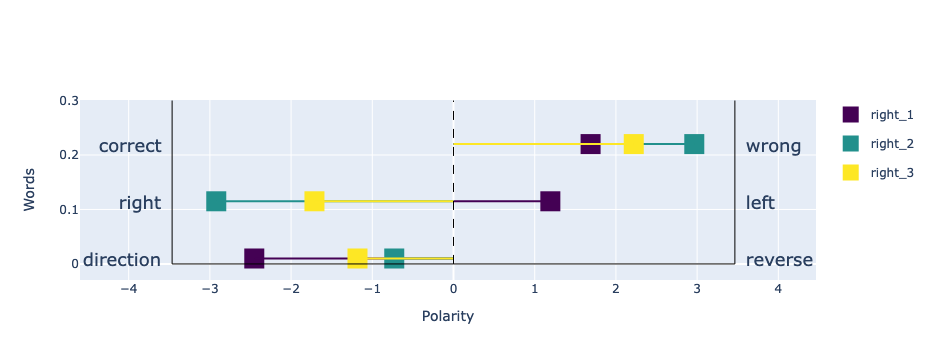

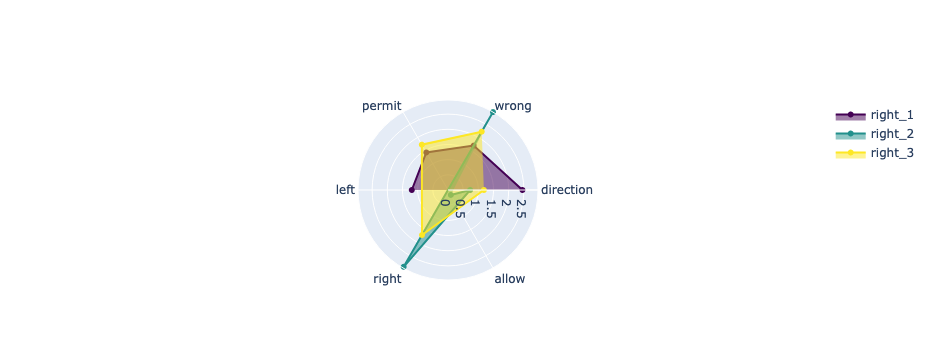

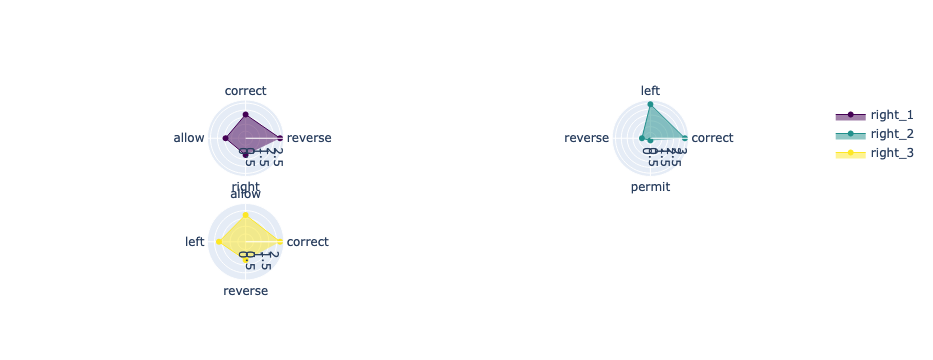

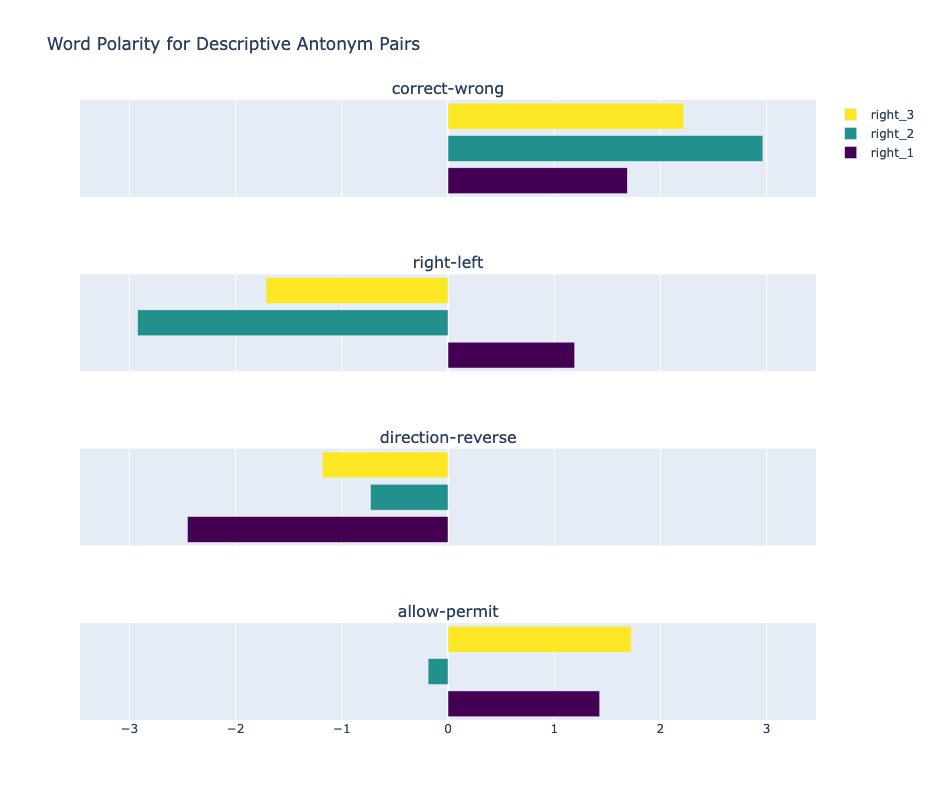

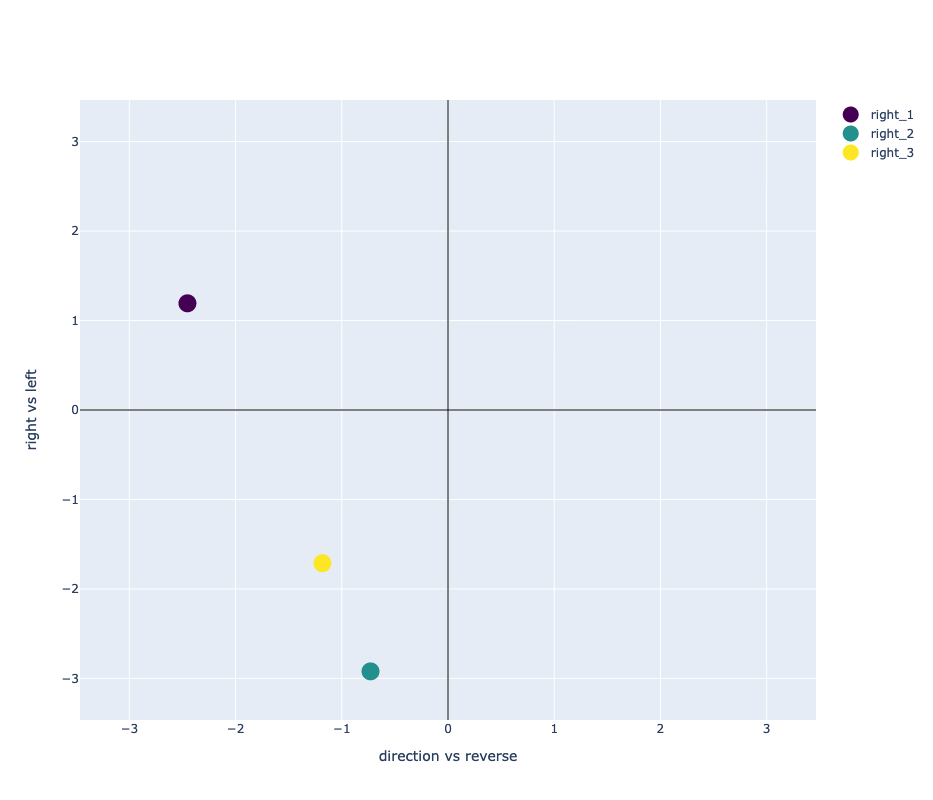

In [4]:
plotter = PolarityPlotter(sort_by='descriptive') 
plotter.plot_word_polarity(words, polar_dimensions)
# plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, words, 4)
plotter.plot_word_polarity_2d_interactive(words, polar_dimensions)

# GPT2 Embeddings

In [3]:
out_path = './antonyms/'
antonym_path = "data/data_file.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = GPT2WordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='base-change', number_polar=4)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
Index: 3
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 1
Dimension: fast <------> slow
high speed  low speed
Value:9.075433731079102


Index: 1
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 2
Dimension: hot <------> cold
high temperature  l

/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




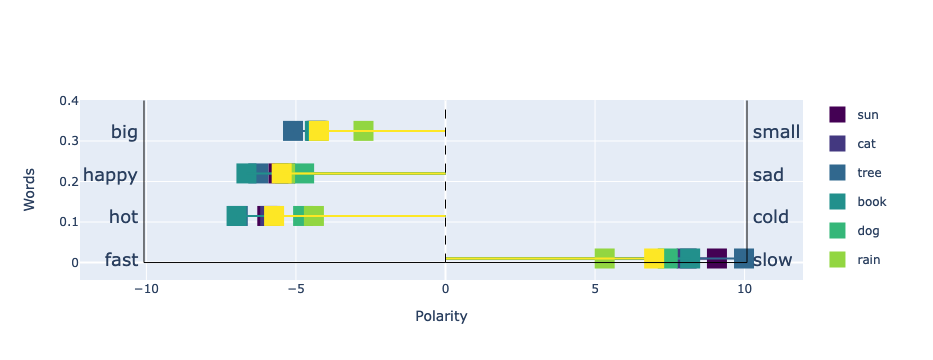

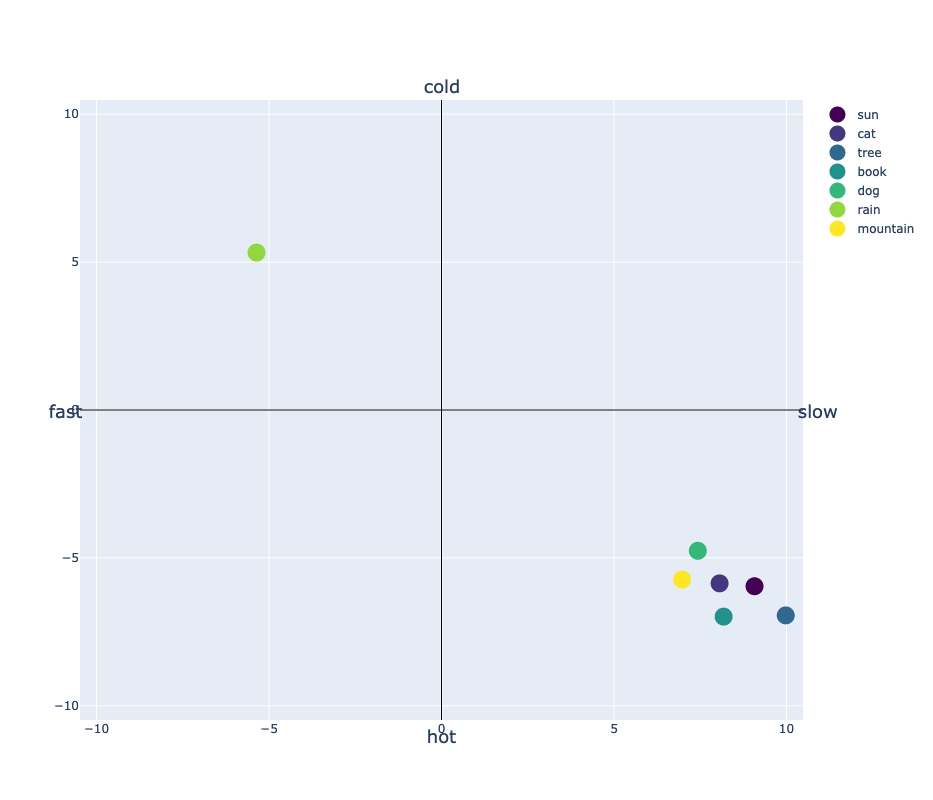

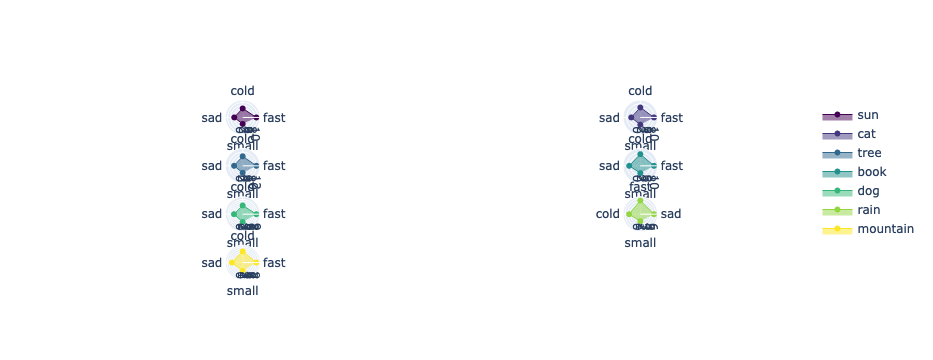

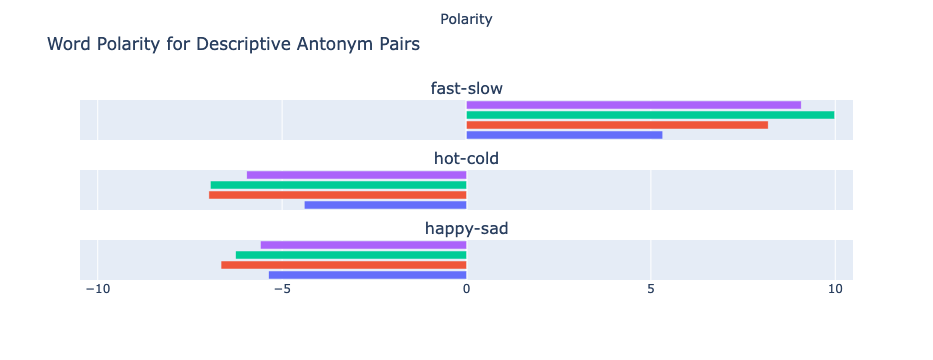

In [4]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, ['rain', 'book', 'tree', 'sun'], 3)

# Roberta WordEmbeddings

In [ ]:
out_path = './antonyms/'
antonym_path = "data/data_file.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = RoBERTaWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=4)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
Index: 0
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 1
Dimension: happy <------> sad
feeling of joy feeling of sorrow
Value: -1.6392117


Index: 1
[[['happy', ['i feel happy today ']], ['sad', ['he looks sad ']]], [['hot', ['it s hot outside ']], ['cold', ['the ice is cold to touch ']]], [['big', ['the elephant is big ']], ['small', ['the ant is small ']]], [['fast', ['the cheetah runs fast ']], ['slow', ['the snail moves slow ']]], [['good', ['eating healthy food is good for you ']], ['bad', ['smoking is bad for your health ']]]]
Top: 2
Dimension: hot <------> cold
high temperatu

In [11]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allowed', 'permitted']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = RoBERTaWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=3)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

32 All definitions:  [['an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt'], ['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'], ['the hand that is on the right side of the body'], ['a turn toward the side of the body that is on the south when the person is facing east'], ['anything in accord with principles of justice'], ['(frequently plural) the interest possessed by law or custom in some intangible thing'], ['make reparations or amends for'], ['put in or restore to an upright position'], ['regain an upright or proper position'], ['make right or correct'], ['being or located on or directed toward the side of the body to the east when facing north'], ['free from error; especially conforming to fact or truth'], ['socially right or correct'], ['in conformance with justice or law or morality'], ['correct in opinion or judgment'], ["appropriate for a c

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['they are endowed by their Creator with certain unalienable right ', 'Certain right can never be granted to the government but must be kept in the hands of the people ', 'a right is not something that somebody gives you it is something that nobody can take away ', 'The right to free speech is protected by the First Amendment of the Constitution ', 'The right to free speech is protected by the Bill of right ', 'The right to vote is a fundamental human right ', 'The right to free speech is a fundamental human right '], 'left': ['she stood on the left ', 'The left side of the room was empty ', 'The left door opened ', 'The left side of the road was blocked ', 'The left window was open ']}, "['correct', 'wrong']": {'correct': ['correct the mistakes ', 'rectify the calculation ', 'The directions were correct ', 'The instructions were correct ', 'The homework was correct ', 'The answer was correct '], 'wrong': ['he feels that you are in the wrong ', 'The poli

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


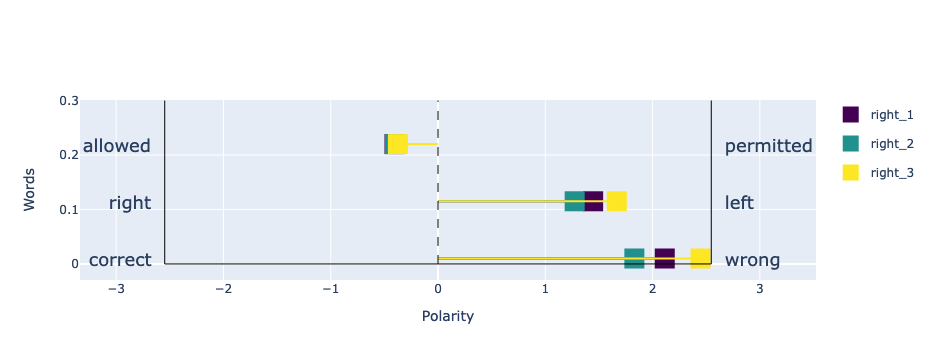

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


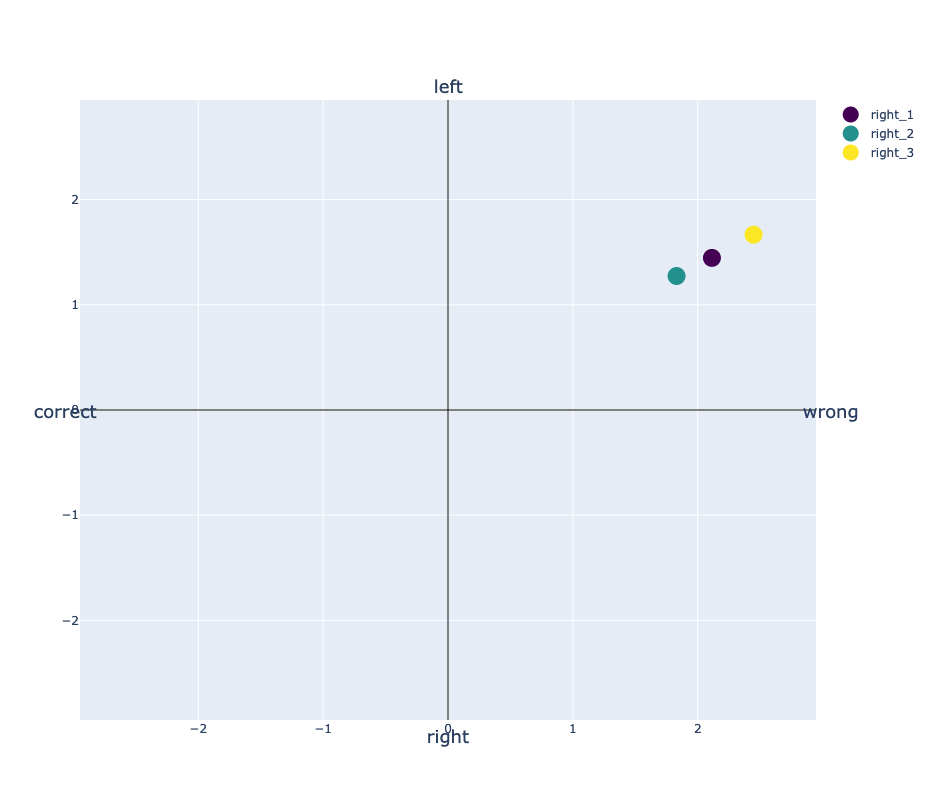

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


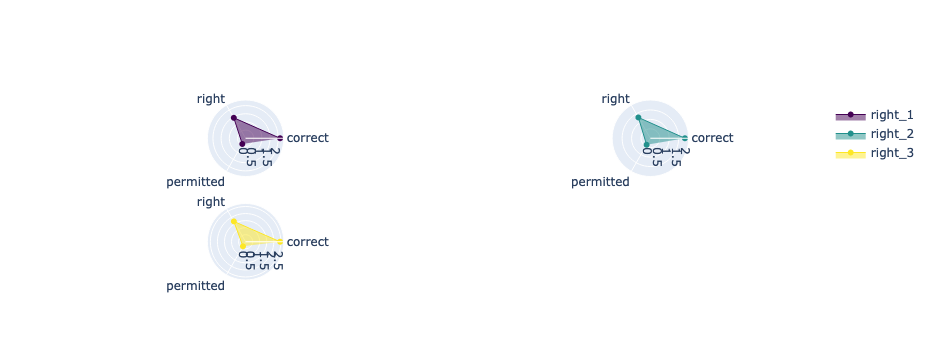

In [13]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
# plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, ['rain', 'book', 'tree', 'sun'], 3)

# Alberta Word Embeddings

In [18]:
out_path = './antonyms/'
antonym_path = "data/data_file1.xlsx"

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonyms_file_path=antonym_path)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = ALBERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=4)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

['i feel happy today']
['he looks sad']
['it s hot outside']
['the ice is cold to touch']
['i feel happy today']
['he looks sad']
['it s hot outside']
['the ice is cold to touch']
['i feel happy today']
['he looks sad']
['it s hot outside']
['the ice is cold to touch']
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.decoder.weight', 'predictions.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['happy', 'sad']": {'happy': ['i feel happy today '], 'sad': ['he looks sad ']}, "['hot', 'cold']": {'hot': ['it s hot outside '], 'cold': ['the ice is cold to touch ']}}
Nan in sentence: i feel happy today 
Nan in sentence: he looks sad 
Nan... Unable to create POLAR dimensions.
Loading antonyms from ./antonyms/lookup_anto_example_dict.pkl
In get_W [array([ 6.76304281e-01, -2.51320362e-01,  3.46465111e-02,  1.52775943e-01,
        4.29377556e-01, -5.54427445e-01, -2.70782262e-02,  9.20492649e-01,
        6.67935550e-01, -3.40186208e-02,  6.66023493e-02,  7.46252060e-01,
        1.27290636e-01, -3.73085022e-01, -6.24260902e-02, -6.47217989e-01,
       -2.35572159e-02,  7.97871709e-01, -1.77171081e-02, -3.20010483e-01,
        1.33517408e+00,  5.97072482e-01, -8.52465808e-01, -2.73860872e-01,
       -6.39296174e-02,  1.32949382e-01,  2.08647534e-01, -3.28205734e-01,
       -2.48330653e-01, -2.09165350e-01,  3.65671605e-01, -1.30871892e-01,
       -2.19259694e-01,  1.13438630e+00, -3.8

IndexError: list index out of range

In [19]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allowed', 'permitted']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = RoBERTaWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=3)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

32 All definitions:  [['an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt'], ['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'], ['the hand that is on the right side of the body'], ['a turn toward the side of the body that is on the south when the person is facing east'], ['anything in accord with principles of justice'], ['(frequently plural) the interest possessed by law or custom in some intangible thing'], ['make reparations or amends for'], ['put in or restore to an upright position'], ['regain an upright or proper position'], ['make right or correct'], ['being or located on or directed toward the side of the body to the east when facing north'], ['free from error; especially conforming to fact or truth'], ['socially right or correct'], ['in conformance with justice or law or morality'], ['correct in opinion or judgment'], ["appropriate for a c

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['they are endowed by their Creator with certain unalienable right ', 'Certain right can never be granted to the government but must be kept in the hands of the people ', 'a right is not something that somebody gives you it is something that nobody can take away ', 'The right to free speech is protected by the First Amendment of the Constitution ', 'The right to free speech is protected by the Bill of right ', 'The right to vote is a fundamental human right ', 'The right to free speech is a fundamental human right '], 'left': ['she stood on the left ', 'The left side of the room was empty ', 'The left door opened ', 'The left side of the road was blocked ', 'The left window was open ']}, "['correct', 'wrong']": {'correct': ['correct the mistakes ', 'rectify the calculation ', 'The directions were correct ', 'The instructions were correct ', 'The homework was correct ', 'The answer was correct '], 'wrong': ['he feels that you are in the wrong ', 'The poli

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




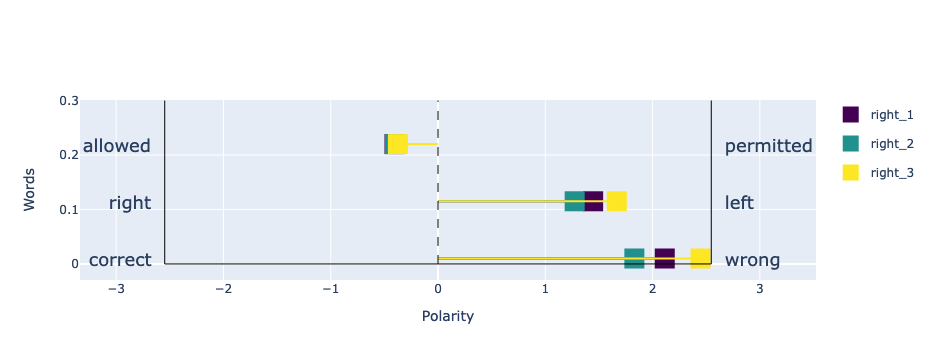

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


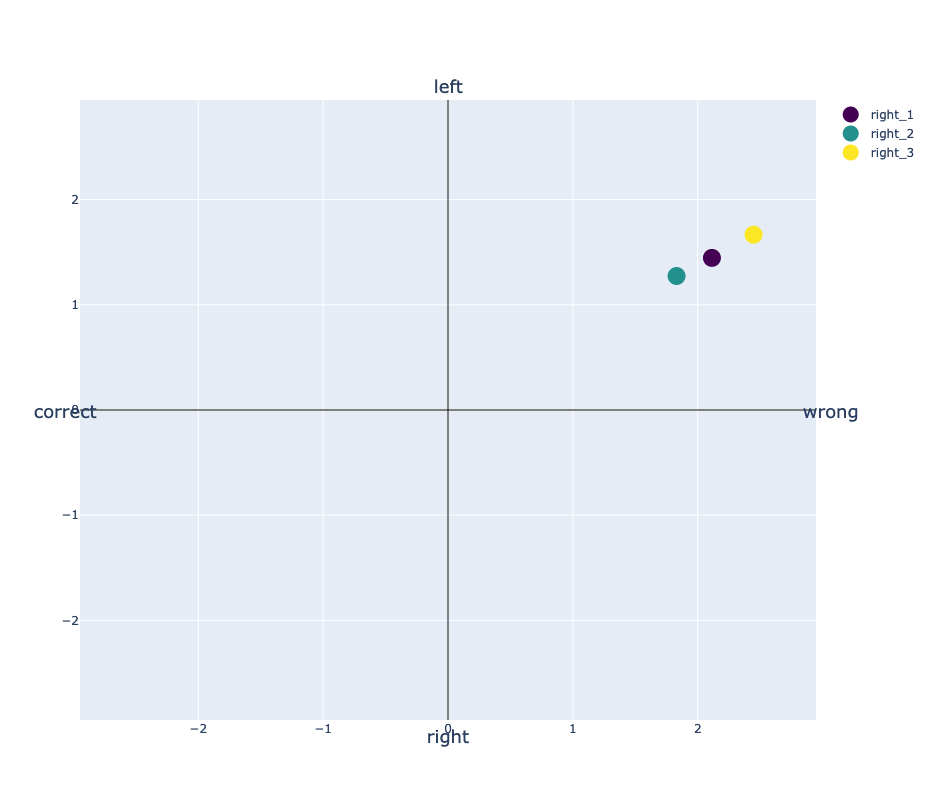

0 [('correct', 'wrong', 2.1138418), ('right', 'left', 1.4462031), ('allowed', 'permitted', -0.40551564)]
1 [('correct', 'wrong', 1.83054), ('right', 'left', 1.2740289), ('allowed', 'permitted', -0.4020071)]
2 [('correct', 'wrong', 2.4473805), ('right', 'left', 1.6668365), ('allowed', 'permitted', -0.37378073)]


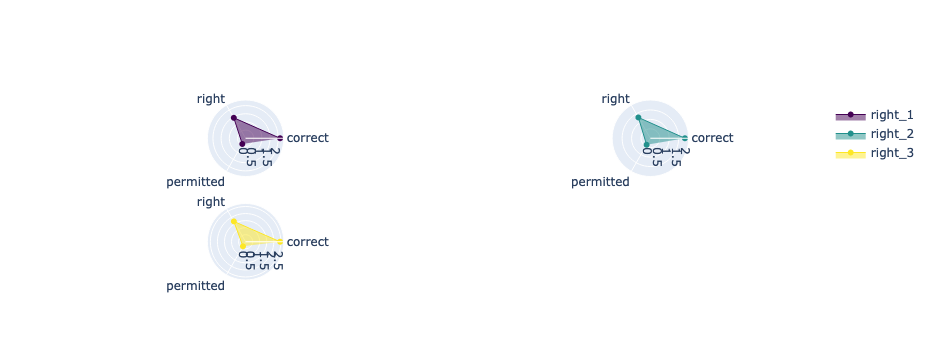

KeyError: 'rain'

In [20]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)
plotter.plot_word_polarity_polar_fig(words, polar_dimensions)
plotter.plot_descriptive_antonym_pairs(words, polar_dimensions, ['rain', 'book', 'tree', 'sun'], 3)

# Others

In [23]:
out_path = './antonyms/'
# antonym_path = "data/data_file.xlsx"
antonym_pairs = [['right', 'left'], ['correct', 'wrong'], ['allowed', 'permitted']]
# [["move", "steady"], ["slow", "fast"], ["black", "white"]]
dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=antonym_pairs)
lookupSpace.create_lookup_files([[1,0], [2,1], [3,0]])

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = read_word_context_file('data/word_context.csv')
wp = WordPolarity(model, antonym_path=antonym_path, method='projection', number_polar=3)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)
    print(dimension)

32 All definitions:  [['an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt'], ['location near or direction toward the right side; i.e. the side to the south when a person or object faces east'], ['the hand that is on the right side of the body'], ['a turn toward the side of the body that is on the south when the person is facing east'], ['anything in accord with principles of justice'], ['(frequently plural) the interest possessed by law or custom in some intangible thing'], ['make reparations or amends for'], ['put in or restore to an upright position'], ['regain an upright or proper position'], ['make right or correct'], ['being or located on or directed toward the side of the body to the east when facing north'], ['free from error; especially conforming to fact or truth'], ['socially right or correct'], ['in conformance with justice or law or morality'], ['correct in opinion or judgment'], ["appropriate for a c

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['right', 'left']": {'right': ['he stood on the right ', 'The right decision should be made ', 'The right answer should be chosen ', 'The right door should be opened ', 'The right path should be taken '], 'left': ['she stood on the left ', 'The left side of the room was empty ', 'The left door opened ', 'The left side of the road was blocked ', 'The left window was open ']}, "['correct', 'wrong']": {'correct': ['She chastised him for his insensitive remarks ', 'The student was correct severely for his incorrect answer ', 'The teacher censured the student severely for his incorrect answer ', 'The teacher correct the student for his incorrect answer ', 'He was correct severely for his mistake '], 'wrong': ['The decision was wrong ', 'The answer was wrong ', 'The instructions were incorrect ', 'The information was incorrect ']}, "['allowed', 'permitted']": {'allowed': ['I will earmark this money for your research ', 'She sets aside time for meditation every day ', 'The government allowe

['right_1', 'right_2', 'right_3']
0 [('allowed', 'permitted', 1.5651354), ('right', 'left', 0.5085764), ('correct', 'wrong', 0.49014968)]
1 [('right', 'left', 1.9925101), ('allowed', 'permitted', 0.6681285), ('correct', 'wrong', 0.15952075)]
2 [('allowed', 'permitted', 1.2592714), ('right', 'left', 0.5959795), ('correct', 'wrong', -0.21045172)]


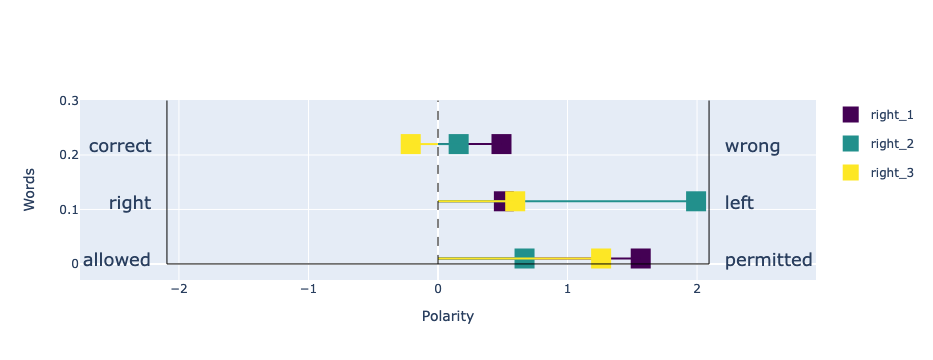

In [22]:
print(words)
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)

In [5]:
out_path = '../SensePOLAR-TeamProject/antonyms/'
# antonym_path = "data_file.xlsx"
dims = [['hot', 'cold'], ['bad', 'good'], ['intelligent', 'unintelligent'], ['capable', 'incapable']]

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=dims)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = ['fire', "sun"], ["the fire is burning", "sun is shining"]
wp = WordPolarity(model, antonym_path=antonym_path,lookup_path=out_path, method='projection', number_polar=2)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading antonyms from ../SensePOLAR-TeamProject/antonyms/lookup_anto_example_dict.pkl
Index: 0
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]
Top: 1
Dimension: test <------> test2
   
Value: -0.87755775


Index: 1
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]
Top: 2
Dimension: one <------> two
   
Value:0.5780946016311646


Index: 0
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['e

/usr/local/anaconda3/envs/SensePOLAR/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




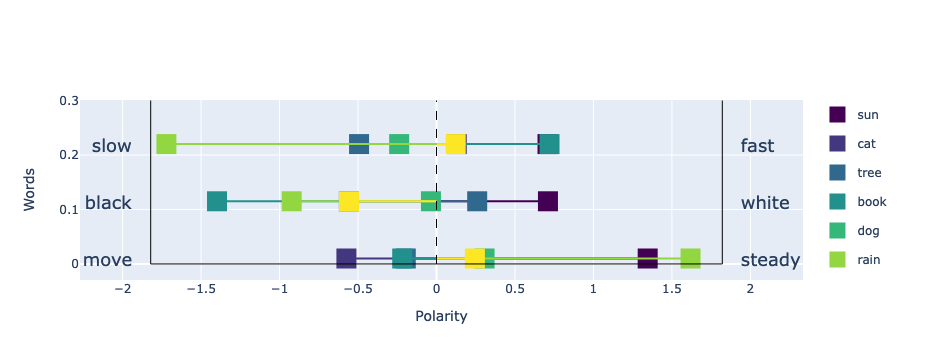

In [4]:
plotter = PolarityPlotter() 
plotter.plot_word_polarity(words, polar_dimensions)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['hot', 'cold']": {'hot': ['hot stove ', 'hot water ', 'a hot august day ', 'a hot stuffy room ', 'she s hot and tired ', 'a hot forehead ', 'the fighting became hot and heavy ', 'a hot engagement ', 'a hot temper ', 'a hot topic ', 'a hot new book ', 'a hot love affair ', 'a hot argument ', 'hot pink ', 'was hot for her ', 'hot pants ', 'hot merchandise ', 'a hot car ', 'a hot sports car ', 'got off to a hot start ', 'in hot pursuit ', 'a red hot line drive ', 'a hot suspect ', 'hot salsa ', 'jalapeno peppers are very hot ', 'a hot drummer ', 'he s hot tonight ', 'one of the hot young talents ', 'cabbage patch dolls were hot last season ', 'make it hot for him ', 'in the hot seat ', 'in hot water ', 'news hot off the press ', 'red hot information ', 'hot at craps ', 'the dice are hot tonight ', 'he s hot at math but not so hot at history ', 'a hot scent ', 'hot for travel ', 'you are hot ', 'hot fuel rods ', 'a hot laboratory ', 'a hot wire ', 'a hot week on the stock market '], 'co

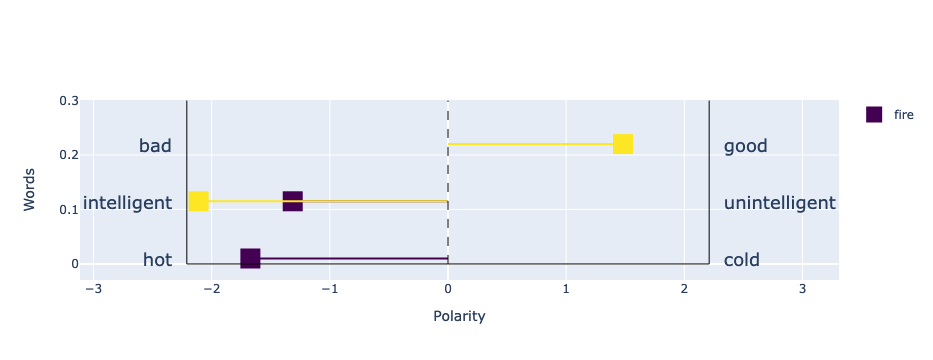

In [20]:
out_path = './antonyms/'
# antonym_path = "data_file.xlsx"
dims = [['hot', 'cold'], ['bad', 'good'], ['intelligent', 'unintelligent'], ['capable', 'incapable']]

dictionary = Dictionary('wordnet', api_key='')    
definition = [dictionary.get_definitions(word[[0]]) in dims for word in words]
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=dims)
lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = ['fire', "sun"], ["the fire is burning", "sun is shining"]
wp = WordPolarity(model, antonym_path=antonym_path,lookup_path=out_path, method='projection', number_polar=2)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

plotter.plot_word_polarity(words, polar_dimensions)

In [21]:
# plotter.plot_word_polarity_2d(words, polar_dimensions)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{"['test', 'test2']": {'test': ['test is first example ', 'second sentence example of test '], 'test2': ['test2 is first example ', 'second sentence example of test2 ']}, "['one', 'two']": {'one': ['example for one ', 'one example sentence '], 'two': ['example for two ', 'two example sentence ']}}
Loading antonyms from ../SensePOLAR-TeamProject/antonyms/lookup_anto_example_dict.pkl
Index: 0
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]
Top: 1
Dimension: test <------> test2
   
Value: -0.0929523


Index: 1
[[['test', ['test is first example ', 'second sentence example of test ']], ['test2', ['test2 is first example ', 'second sentence example of test2 ']]], [['one', ['example for one ', 'one example sentence ']], ['two', ['example for two ', 'two example sentence ']]]]

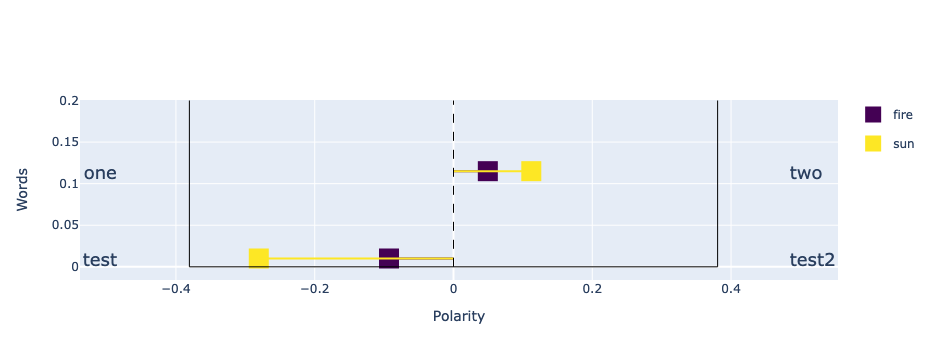

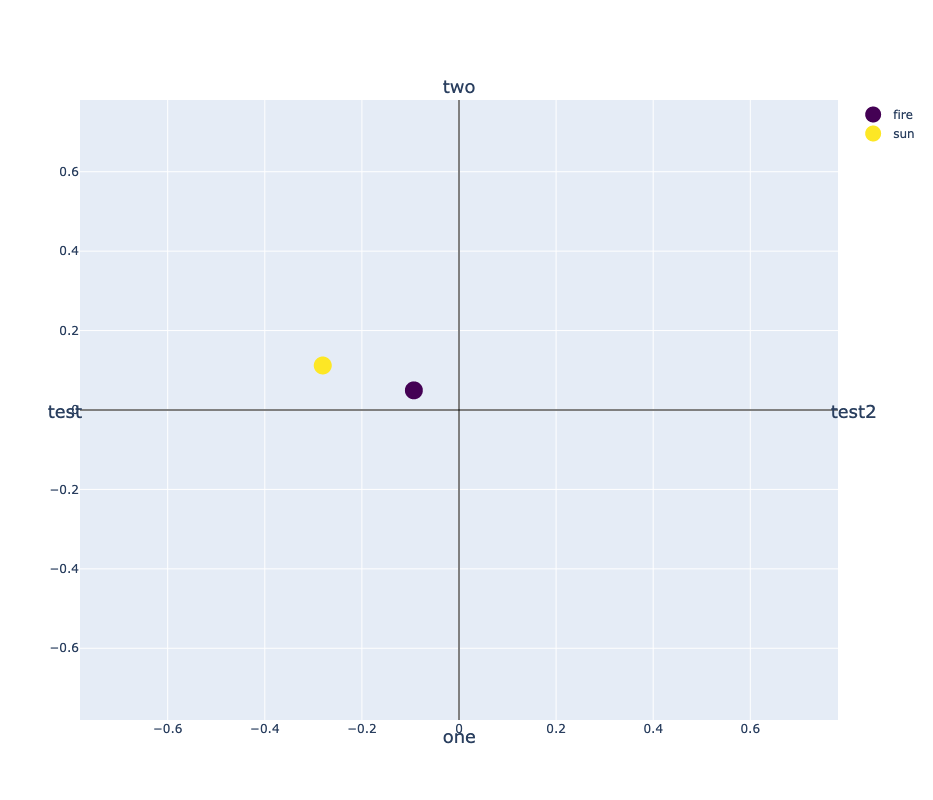

In [22]:
out_path = '../SensePOLAR-TeamProject/antonyms/'
# antonym_path = "data_file.xlsx"
dims = [['hot', 'cold'], ['bad', 'good'], ['intelligent', 'unintelligent'], ['capable', 'incapable']]

dictionary = Dictionary('wordnet', api_key='')    
# dictionary = Dictionary('dictionaryapi', api_key='b4b51989-1b9d-4690-8975-4a83df13efc4 ')
# dictionary = Dictionary('wordnik', api_key='6488daf20061aa3e6200c013b470fa8ef1f2678c19b36ef05')
# lookupSpace = LookupCreator(dictionary, out_path, antonym_pairs=dims)
# lookupSpace.create_lookup_files()

antonym_path = out_path + "polar_dimensions.pkl"

model = BERTWordEmbeddings()

pdc = PolarDimensions(model, antonym_path=out_path + "antonym_wordnet_example_sentences_readable_extended.txt")
pdc.create_polar_dimensions(out_path)

words, context = ['fire', "sun"], ["the fire is burning", "sun is shining"]
wp = WordPolarity(model, antonym_path=antonym_path,lookup_path=out_path, method='base-change', number_polar=2)

polar_dimensions = []
for word, context in zip(words, context):
    dimension = wp.analyze_word(word, context)
    polar_dimensions.append(dimension)

plotter.plot_word_polarity(words, polar_dimensions)
plotter.plot_word_polarity_2d(words, polar_dimensions)

In [35]:
def get_most_descriptive_antonym_pairs(words, polar_dimensions, inspect_words, n):
    """
    Retrieves the common antonym pairs that best describe the inspected words.

    Args:
        words (list): A list of all words.
        polar_dimensions (list): A list of polar dimensions.
        inspect_words (list): A subset of words to inspect.
        n (int): Number of antonym pairs to retrieve.

    Returns:
        list: The common antonym pairs that best describe the inspected words,
              along with the polarity values.

    Note:
        This implementation assumes that each word has only one antonym pair associated with it.
    """
    word_dict = {word: None for word in words}
    print(word_dict)
    for idx, item in enumerate(polar_dimensions):
        antonym_dict = {}
        for antonym1, antonym2, value in item:
            antonym_dict[(antonym1, antonym2)] = value
        word_dict[words[idx]] = antonym_dict

    common_antonyms = set(word_dict[inspect_words[0]].keys())
    for word in inspect_words[1:]:
        common_antonyms.intersection_update(word_dict[word].keys())

    descriptive_pairs = []
    scores = []

    for antonym in common_antonyms:
        score = sum(abs(word_dict[word][antonym]) for word in inspect_words)
        descriptive_pairs.append(antonym)
        scores.append(score)

    sorted_pairs = [pair for _, pair in sorted(zip(scores, descriptive_pairs), reverse=True)]

    if len(sorted_pairs) > n:
        sorted_pairs = sorted_pairs[:n]

    result = []
    for pair in sorted_pairs:
        polarities = [word_dict[word][pair] for word in inspect_words]
        result.append((pair, polarities))

    return result[:n]


In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as colors

def plot_descriptive_antonym_pairs(words, descriptive_pairs):
    """
    Plots each word against the descriptive antonym pairs using a horizontal bar plot.

    Args:
        words (list): A list of words.
        descriptive_pairs (list): The descriptive antonym pairs, along with the polarity values.

    Returns:
        None
    """
    fig = make_subplots(rows=len(descriptive_pairs), cols=1, shared_xaxes=True, subplot_titles=[f"{pair[0][0]}-{pair[0][1]}" for pair in descriptive_pairs])

    #take max absolute value from all polarity values
    scale = max(max([abs(n) for n in polars]) for _, polars in descriptive_pairs)
    min_polarity = -scale
    max_polarity = scale

    color_sequence = colors.qualitative.Plotly

    for i, (antonym_pair, polarity_values) in enumerate(descriptive_pairs):
        fig_idx = i + 1

        # Assign colors to words in each antonym pair
        color_map = {word: color_sequence[j % len(color_sequence)] for j, word in enumerate(words)}
        legend_names = []  # List to store legend names for each word in the antonym pair

        for j, word in enumerate(words):
            if word not in legend_names:
                legend_names.append(word)
                fig.add_trace(go.Bar(
                    y=[word],
                    x=[polarity_values[j]],
                    name=word,
                    marker=dict(color=color_map[word]),  # Assign the color for each word
                    orientation='h',
                    showlegend=False,
                    offsetgroup=f"Pair {fig_idx}"
                ), row=fig_idx, col=1)

    fig.update_layout(
        title="Word Polarity for Descriptive Antonym Pairs",
        xaxis_title="Polarity",
        barmode="group",
        legend_traceorder="reversed",
        xaxis=dict(range=[min_polarity, max_polarity])  # Set the x-axis range from min to max polarity values
    )

    fig.update_yaxes(showticklabels=False)

    fig.show()


In [34]:
get_most_descriptive_antonym_pairs(words, polar_dimensions, ['tree', 'rain'], 4)

{'fire': None, 'sun': None, 'tree': None, 'rain': None}


AttributeError: 'NoneType' object has no attribute 'keys'

In [27]:
plot_descriptive_antonym_pairs(['sun', 'rain'], get_most_descriptive_antonym_pairs(words, polar_dimensions, ['tree', 'rain'], 4))

KeyError: 'tree'

In [ ]:
get_most_descriptive_antonym_pairs(words, polar_dimensions, ['tree', 'rain'], 4)

[(('big', 'small'), [-1.1064599, -2.539312]),
 (('good', 'bad'), [-0.7773825, 0.6468782]),
 (('hot', 'cold'), [-0.35254246, -1.0438247])]